### Cân nhắc tới môi trường
- Trong các chương trước ta đã thực hành một số ứng dụng của học máy và khớp mô hình với nhiều tập dữ liệu khác nhau. Tuy nhiên, ta chưa bao giờ dừng lại để nhìn nhận về nguồn gốc của tập dữ liệu, hoặc dự định sẽ làm gì với đầu ra của mô hình.
- Đa phần là khi có được dữ liệu, các nhà phát triển học máy thường đâm đầu vào triển khai các mô hình mà không để ý các vấn đề cơ bản này.
    + Nhiều triển khai học máy thất bại có thể bắt nguồn từ khuôn mẫu này. Đôi khi các mô hình có thể có độ chính xác rất tốt trên tập kiểm tra nhưng lại thất bại trong triển khai thực tế, khi mà phân phối dữ liệu thay đổi đột ngột.
    + Đôi khi chính việc triển kahi một mô hình có thể là chất xúc tác gây nhiễu cho phân phối dữ liệu, ví dụ ta huấn luyện một mô hình để dự đoán xem một người có trả nợ hay không rồi mô hình chỉ ra rằng việc chọn giày dép của ứng viên liên quan đến rủi ro vỡ nợ (giày tây trả được nợ, giày thể thao thì không) -> ta có xu hướng chỉ cấp các khoản vay cho các ứng viên mang giày tây và không cho vay với những người mang giày thể thao.
-> Trong trường hợp này, việc ta không cân nhắc kỹ khi nhảy vọt từ nhận dạng khuôn mẫu đến ra quyết định và việc không xem xét kỹ các yếu tối mô trường có thể gây ra hậu quả nghiêm trọng. Như ví dụ trên, không sớm thì muộn ta bắt đầu đưa ra quyêt định dựa trên kiểu giày, khách hàng sẽ để ý và mang giày tây nhưng chỉ số tín dụng của họ không hề cải thiện
-> Bằng việc đưa ra quyết định dựa trên mô hình trong một môi trường, ta có thể làm hỏng chính mô hình đó.


### 1. Dịch chuyển phân phối
- Trong mục này, ta  sẽ xem xét kỹ vài cách khác nhau mà phân phối dữ liệu có thể dịch chuyển và những gì ta có thể làm để cữu vãn hiệu suất mô hình.
- Nếu phân phối sinh dữ liệu P(x, y) có thể dịch chuyển theo cách khác nhau tại bất kỳ thời điểm nào thì việc học một bộ phân loại mạnh mẽ là điều bất khả thi.
- May mắn thay, dưới vài giả định chặt về cách dữ liệu có thể thay đổi trong tương lai, một vài thuật toán có thể phát hiện được sự dịch chuyển này và thậm chí có thể thích nghi để đạt được độ chính xác cao hơn.
#### 1.1 Dịch chuyển hiệp biến
- Một trong những dạng dịch chuyển phân phối được nghiên cứu rộng rãi nhất là dịch chuyển hiệp biến. Ở đây ta giả định rằng mặc dù phân phối đầu vào có thể biến đổi theo thời gian nhưng hàm nhãn tức là phân phối có điều kiện P(y | x) thì không thay đổi.
- Xem xét bài toán phân biệt mèo và chó với tập dữ liệu huấn luyện gồm các ảnh sau:

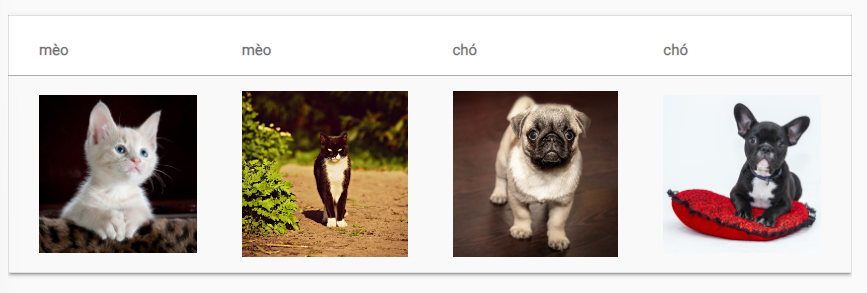

- Tại thời điểm kiểm tra ta phải phân loại các ảnh dưới đây:

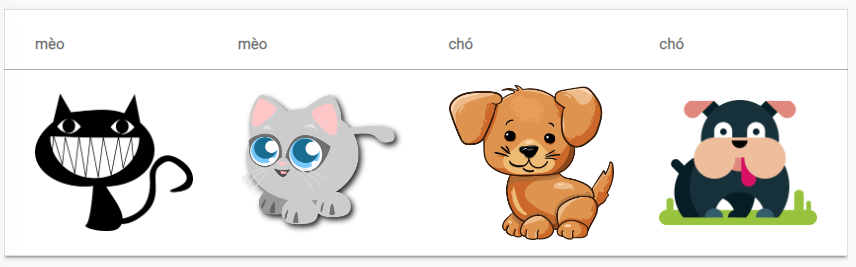

- Rõ ràng việc phân loại tốt trong trường hợp này là rất khó khăn. Trong khi tập dữ liệu huấn luyện bao gồm các ảnh đời thực thì tập kiểm tra chỉ chứa các ảnh hoạt hình với màu sắc thậm chí còn không thực tế.
- Việc huấn luyện trên một tập dữ liệu khác biệt đáng kể so với tập kiểm tra mà không có kế hoạch cụ thể là ý tưởng tồi. Nhưng những trường hợp này rất phổ biến.
- Vấn đề này là dịch chuyển hiệp biến vì gốc rễ của nó là do sự thay đổi trong phân phối của các đặc trưng (hiệp biến). Theo ngôn ngữ toán học, ta có thể nói rằng P(x) thay đổi nhưng P(y | x) không thay đổi.
- Khi ta tin rằng x gây ra y thì dịch chuyển hiệp biến thường là một giả định hợp lý mặc dù tính hữu dụng của nó không chỉ giới hạn trong trường hợp này.

#### 1.2 Dịch chuyển nhãn
- Vấn đề ngược lại xuất hiện khi chúng ta tin rằng điều gây ra sự dịch chuyển là một thay đổi trong phân phối biên của nhãn P(y) trong khi phân phối có điều kiện theo lớp P(x | y) không thay đổi. 
- Dịch chuyển nhãn là một giả định hợp lý khi chúng ta tin rằng y gây ra x.
- Ví dụ, thông thường ta muốn dự đoán kết quả chẩn đoán nếu biết các biểu hiện của bệnh. Trong trường hợp này, ta tin rằng kết quả chấn đoán gây ra các biểu hiện, tức là bệnh gây ra các triệu chứng. 
- Thinhg thoảng các giả định dịch chuyển nhãn và dịch chuyển hiệp biến có thể xảy ra đồng thời. Ví dụ, khi hàm gán nhãn là tất định và không đổi, dịch chuyển hiệp biến sẽ luôn xảy ra, kể cả khi dịch chuyển nhãn cũng đang xảy ra. 